In [7]:
from scipy.stats import skew,kurtosis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
data=pd.read_csv("house_price.csv")
print(data)

                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0                3699  
1                4615  
2  

In [9]:
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [10]:
data.tail()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689
13196,other,4 BHK,3600.0,5.0,400.0,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4,10407
13199,Doddathoguru,1 BHK,550.0,1.0,17.0,1,3090


In [11]:
data.shape

(13200, 7)

In [12]:
data.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

In [13]:
num_cols=data.select_dtypes(include='number').columns
num_cols

Index(['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft'], dtype='object')

In [14]:
cat_cols=data.select_dtypes(include='object').columns
cat_cols

Index(['location', 'size'], dtype='object')

In [15]:
data.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [16]:
data.duplicated().sum()

1049

In [17]:
data['price_per_sqft'].isnull().value_counts()

price_per_sqft
False    13200
Name: count, dtype: int64

In [18]:
data.describe(include="all")

,location,size,total_sqft,bath,price,bhk,price_per_sqft
count,13200,13200,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
unique,241,31,NaN,NaN,NaN,NaN,NaN
top,other,2 BHK,NaN,NaN,NaN,NaN,NaN
freq,2872,5192,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,NaN,NaN,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,NaN,NaN,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,NaN,NaN,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,NaN,NaN,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,NaN,NaN,1672.000000,3.000000,120.000000,3.000000,7.317000e+03


In [19]:
data.info

<bound method DataFrame.info of                        location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0                36

In [20]:
data.value_counts()

location      size       total_sqft  bath  price   bhk  price_per_sqft
Haralur Road  2 BHK      1243.0      2.0   46.00   2    3700              18
TC Palaya     3 Bedroom  1200.0      2.0   66.00   3    5500              12
other         3 BHK      1464.0      3.0   56.00   3    3825              12
Chandapura    1 BHK      645.0       1.0   16.45   1    2550              11
HSR Layout    2 BHK      1140.0      2.0   46.00   2    4035               9
                                                                          ..
Jakkur        2 BHK      1100.0      2.0   52.00   2    4727               1
                                           53.35   2    4850               1
                         1125.0      2.0   44.75   2    3977               1
                                           65.00   2    5777               1
other         9 Bedroom  4500.0      9.0   166.00  9    3688               1
Name: count, Length: 12151, dtype: int64

In [21]:
data.nunique()

location           241
size                31
total_sqft        1972
bath                19
price             1952
bhk                 19
price_per_sqft    4951
dtype: int64

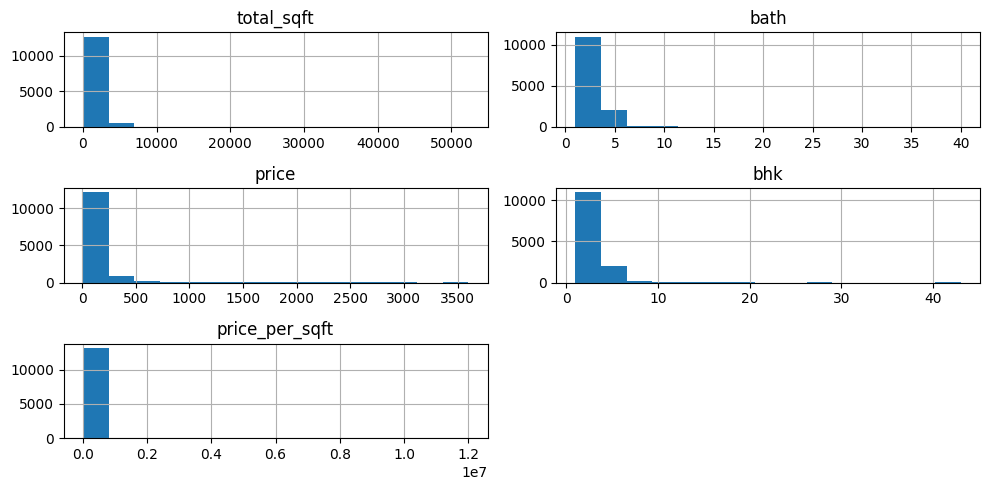

In [22]:
data[num_cols].hist(bins=15,figsize=(10,5),layout=(3,2))
plt.tight_layout()
plt.show()

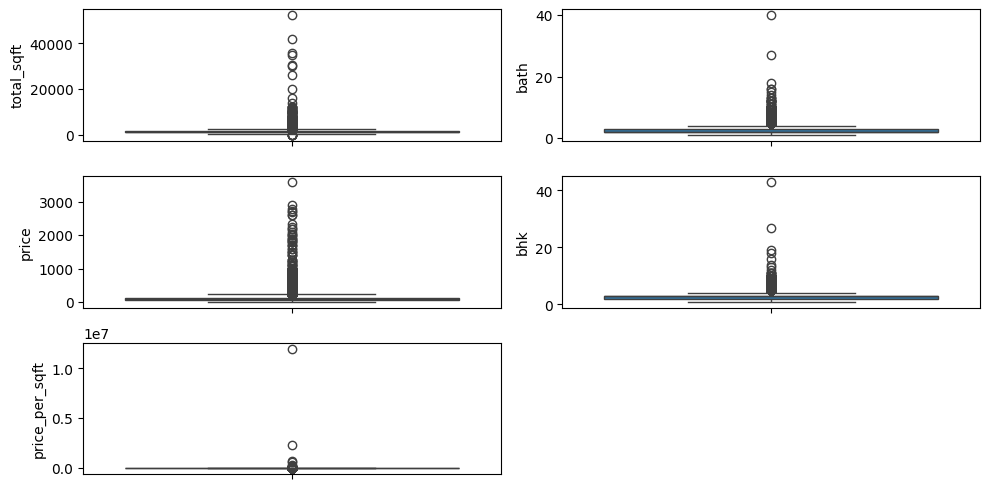

In [23]:
plt.figure(figsize=(10,5))
for i,col in enumerate(num_cols):
    plt.subplot(3,2,i+1)
    sns.boxplot(data[col])
plt.tight_layout()
plt.show()


<Axes: xlabel='size', ylabel='total_sqft'>

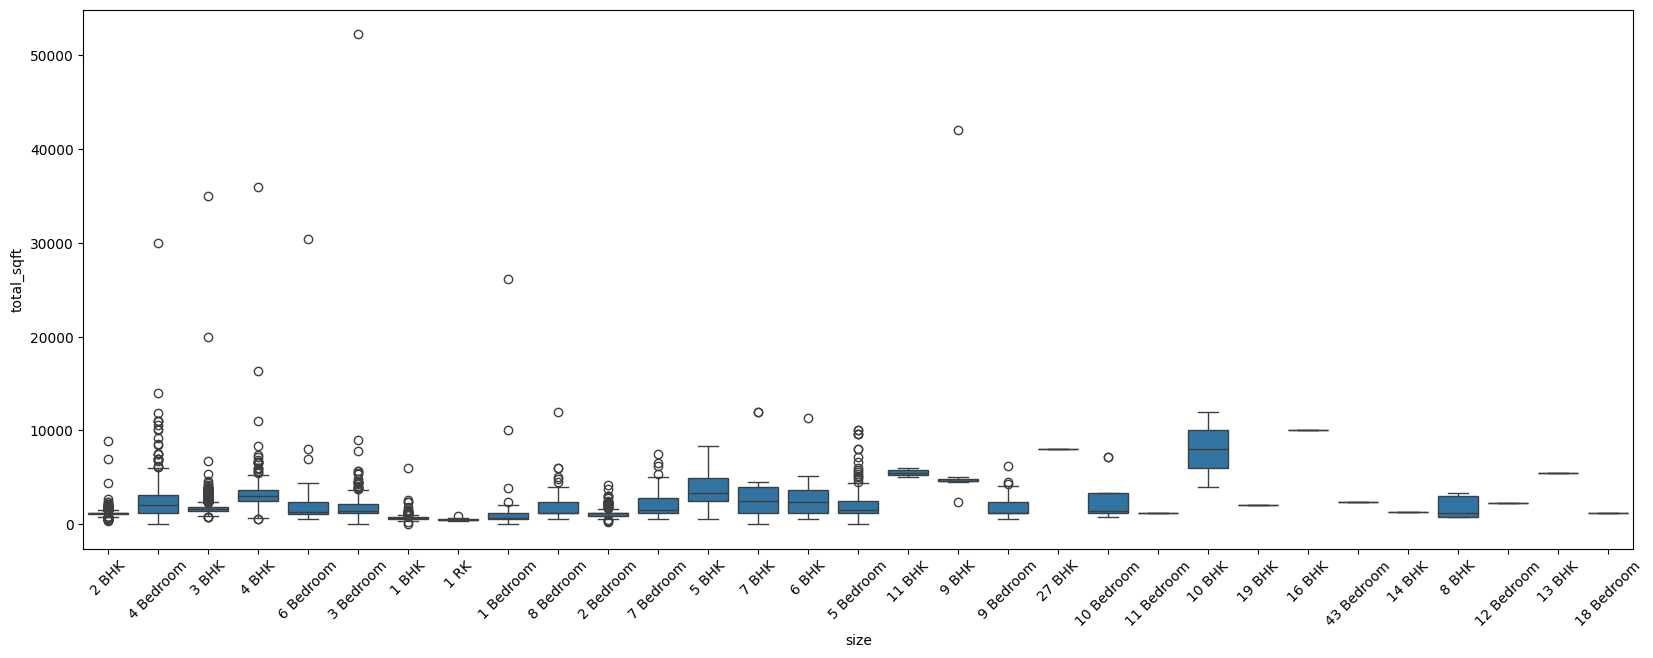

In [24]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=45)
sns.boxplot(x='size',y='total_sqft',data=data)

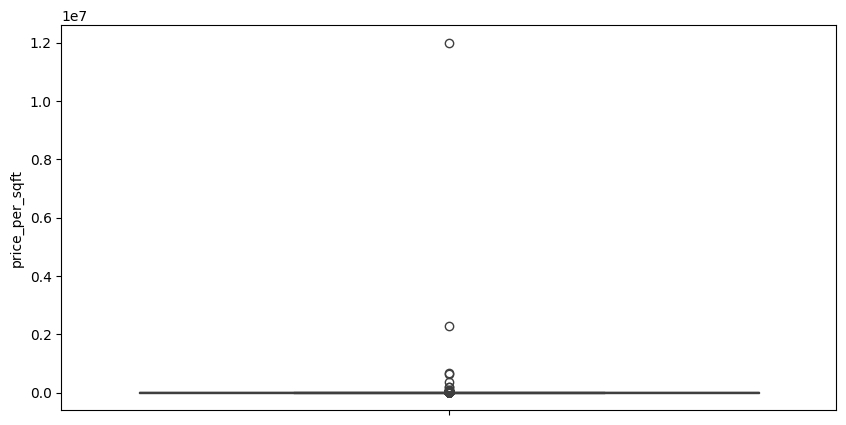

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(data['price_per_sqft'])
plt.show()


In [26]:
print(data['price_per_sqft'].mean())
print(data['price_per_sqft'].std())

7920.336742424242
106727.16032810867


# Detect the outliers in the column 'price_per_sqft' and remove it using capping method.

### Z-SCORE METHOD

In [27]:
data['z_score']=(data['price_per_sqft']-data['price_per_sqft'].mean())/data['price_per_sqft'].std()
print(data.head())


                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft   z_score  
0            3699 -0.039553  
1            4615 -0.030970  
2            4305 -0.033875  
3            6245 -0.015697  
4            4250 -0.034390  


In [28]:
#data with outliers
print(data.loc[(data['z_score']>3)|(data['z_score']<-3)])

             location       size  total_sqft  bath  price  bhk  \
345             other  3 Bedroom        11.0   3.0   74.0    3   
1106            other  5 Bedroom        24.0   2.0  150.0    5   
4044   Sarjapur  Road  4 Bedroom         1.0   4.0  120.0    4   
4924            other      7 BHK         5.0   7.0  115.0    7   
11447      Whitefield  4 Bedroom        60.0   4.0  218.0    4   

       price_per_sqft     z_score  
345            672727    6.229030  
1106           625000    5.781843  
4044         12000000  112.362023  
4924          2300000   21.476067  
11447          363333    3.330105  


In [29]:
print(data[data['z_score']<-3])

Empty DataFrame
Columns: [location, size, total_sqft, bath, price, bhk, price_per_sqft, z_score]
Index: []


In [30]:
#data without outliers
new_data=data[(data['z_score']>-3)&(data['z_score']<3)]
print(new_data)

                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft   z_score  
0                3699 -0.039553  
1      

In [31]:
#capping used to remove the outliers
new_data=data.copy()
upper_limit=data['price_per_sqft'].mean()+3*data['price_per_sqft'].std()
lower_limit=data['price_per_sqft'].mean()-3*data['price_per_sqft'].std()
print(upper_limit)
print(lower_limit)
new_data.loc[(new_data['price_per_sqft']>upper_limit,'price_per_sqft')]=upper_limit
new_data.loc[(new_data['price_per_sqft']<lower_limit,'price_per_sqft')]=lower_limit
print(new_data)


328101.8177267502
-312261.14424190175
                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft   z_score  
0  

C:\Users\AP\AppData\Local\Temp\ipykernel_480\2395704945.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '328101.8177267502' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_data.loc[(new_data['price_per_sqft']>upper_limit,'price_per_sqft')]=upper_limit


<Axes: ylabel='price_per_sqft'>

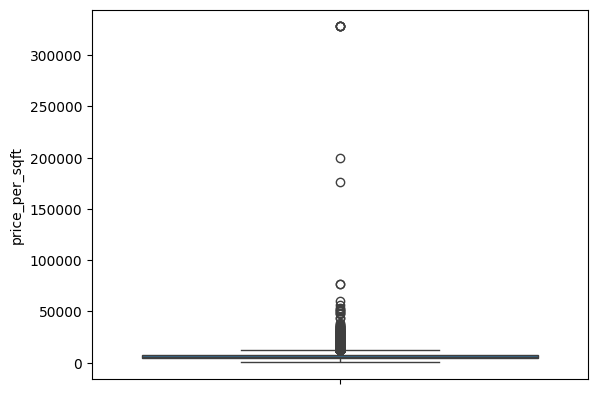

In [32]:
sns.boxplot(new_data['price_per_sqft'])

In [33]:
new_data['price_per_sqft'].quantile()

5438.0

### MEAN AND SD METHOD

In [34]:

upper_limit=data['price_per_sqft'].mean()+3*data['price_per_sqft'].std()
lower_limit=data['price_per_sqft'].mean()-3*data['price_per_sqft'].std()
print("upper limit:",upper_limit)
print("lower limit:",lower_limit)

upper limit: 328101.8177267502
lower limit: -312261.14424190175


In [35]:
#data with outliers
data.loc[(data['price_per_sqft']>upper_limit)|(data['price_per_sqft']<lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
345,other,3 Bedroom,11.0,3.0,74.0,3,672727,6.229030
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000,5.781843
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000,112.362023
4924,other,7 BHK,5.0,7.0,115.0,7,2300000,21.476067
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333,3.330105


<Axes: ylabel='price_per_sqft'>

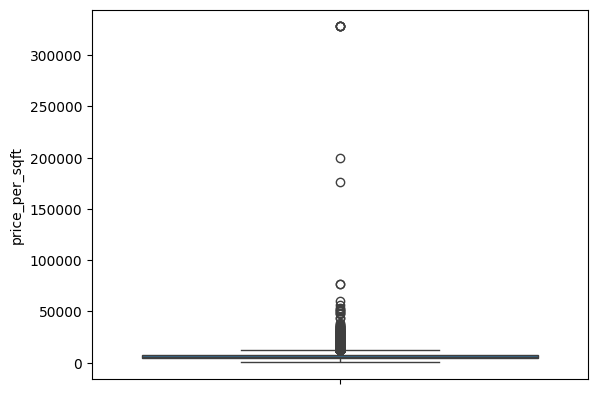

In [36]:
sns.boxplot(new_data['price_per_sqft'])

In [37]:
#capping
new_data=data.copy()
new_data.loc[(new_data['price_per_sqft']>upper_limit,'price_per_sqft')]=upper_limit
new_data.loc[(new_data['price_per_sqft']<lower_limit,'price_per_sqft')]=lower_limit


C:\Users\AP\AppData\Local\Temp\ipykernel_480\3329796282.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '328101.8177267502' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_data.loc[(new_data['price_per_sqft']>upper_limit,'price_per_sqft')]=upper_limit


<Axes: ylabel='price_per_sqft'>

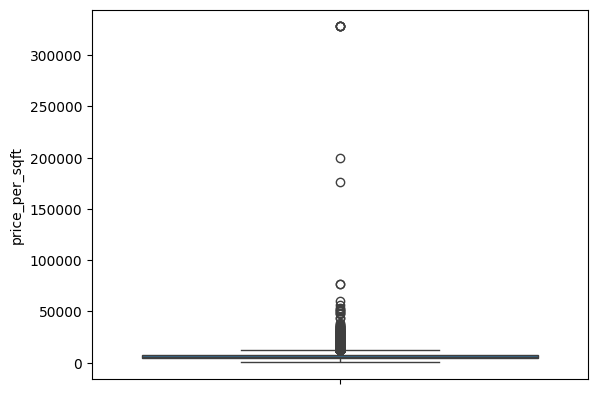

In [38]:
sns.boxplot(new_data['price_per_sqft'])

### IQR METHOD

In [75]:
#IQR
q1=data['price_per_sqft'].quantile(0.25)
q3=data['price_per_sqft'].quantile(0.75)
iqr=q3-q1
q1,q3,iqr

(4267.0, 7317.0, 3050.0)

In [76]:
new_data=data.copy()
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
upper_limit,lower_limit

(11892.0, -308.0)

<Axes: ylabel='price_per_sqft'>

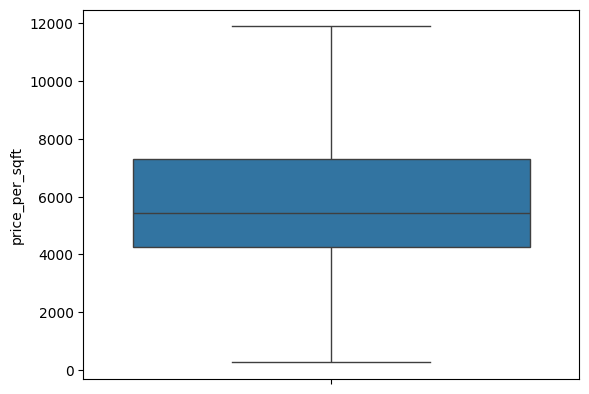

In [77]:
new_data.loc[(new_data['price_per_sqft']>upper_limit,'price_per_sqft')]=upper_limit
new_data.loc[(new_data['price_per_sqft']<lower_limit,'price_per_sqft')]=lower_limit
sns.boxplot(new_data['price_per_sqft'])

### PERCENTILE METHOD


In [70]:
upper_limit=data['price_per_sqft'].quantile(0.95)
lower_limit=data['price_per_sqft'].quantile(0.05)
print("upper limit:",upper_limit)
print("lower limit:",lower_limit)

upper limit: 15312.099999999984
lower limit: 3107.8500000000004


In [71]:
data.loc[(data['price_per_sqft']>upper_limit)|(data['price_per_sqft']<lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.0,1,2500
41,Sarjapur Road,3 BHK,1254.0,3.0,38.0,3,3030
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
...,...,...,...,...,...,...,...
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13191,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,250.0,7,16666


In [72]:
#capping
new_data=data.copy()
new_data.loc[(new_data['price_per_sqft']>upper_limit),'price_per_sqft']=upper_limit
new_data.loc[(new_data['price_per_sqft']<lower_limit),'price_per_sqft']=lower_limit

C:\Users\AP\AppData\Local\Temp\ipykernel_480\2543976233.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '15312.099999999984' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_data.loc[(new_data['price_per_sqft']>upper_limit),'price_per_sqft']=upper_limit


<Axes: ylabel='price_per_sqft'>

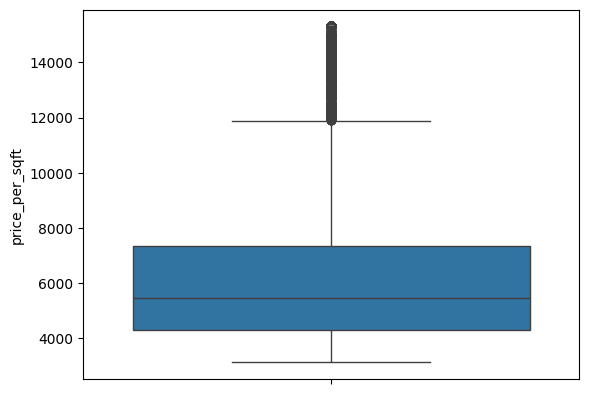

In [73]:
sns.boxplot(new_data['price_per_sqft'])

#### IQR METHOD seems to work best to remove outliers of this column data. 

## checking normality of the column

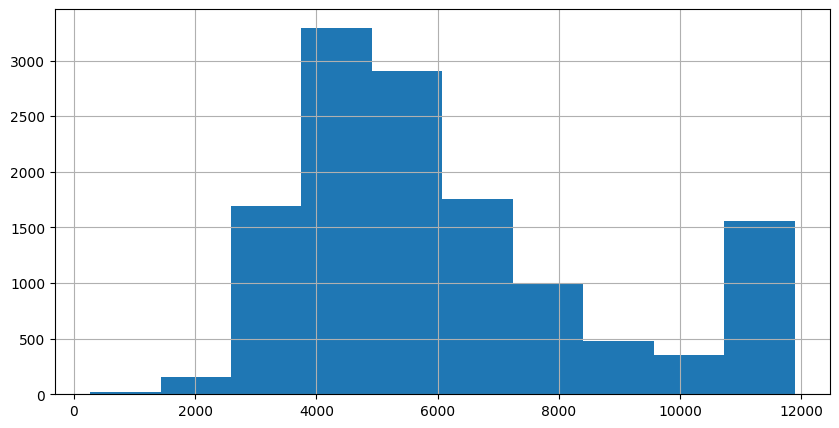

In [78]:
new_data['price_per_sqft'].hist(bins=10,figsize=(10,5))

plt.show()

<Axes: xlabel='price_per_sqft', ylabel='Count'>

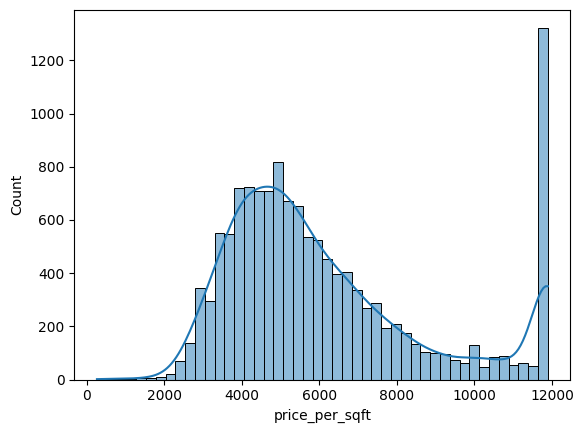

In [79]:

sns.histplot(data=new_data,x=new_data.price_per_sqft,kde=True)


In [80]:
print(new_data['price_per_sqft'].mean())
print(new_data['price_per_sqft'].median())

6181.215984848485
5438.0


In [81]:
new_data['price_per_sqft'].skew()

0.9755141550670372

#### Right moderately skewed

In [82]:
#kurtosis(data['price_per_sqft'],fisher=False)
kurtosis(new_data['price_per_sqft'],fisher=False)

2.984677290616892

#### k<3 => platykurtic

## Performing transformations using logarithmetic method

In [83]:
new_data['log_price_per_sqft']=np.log(new_data['price_per_sqft'])
new_data['log_price_per_sqft']

0        8.215818
1        8.437067
2        8.367532
3        8.739536
4        8.354674
           ...   
13195    8.808220
13196    9.315691
13197    8.567506
13198    9.250234
13199    8.035926
Name: log_price_per_sqft, Length: 13200, dtype: float64

<Axes: xlabel='log_price_per_sqft', ylabel='Count'>

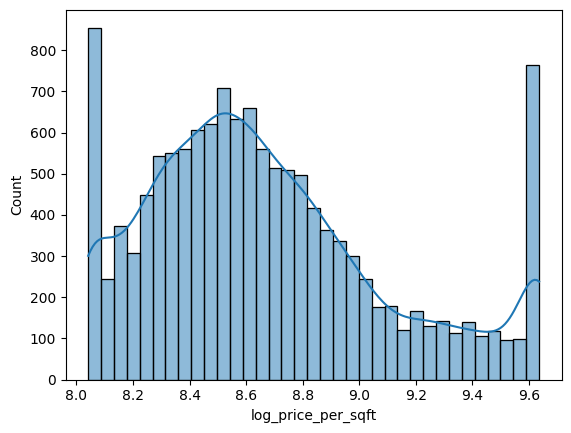

In [52]:
sns.histplot(data=new_data,x=new_data.log_price_per_sqft,kde=True)

In [84]:
new_data['log_price_per_sqft'].skew()

0.1230632402038614

In [85]:
kurtosis(new_data['log_price_per_sqft'],fisher=False)

3.274863413814331

In [87]:
new_data['log_price_per_sqft'].mean()

8.645776612101773

In [88]:
new_data['log_price_per_sqft'].median()

8.601166625192416

CORRELATION

In [89]:
data1=new_data.drop(["location","size","log_price_per_sqft"],axis=1)
corr1=data1.corr()
corr1

,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.392743,0.574330,0.346013,0.160064
bath,0.392743,1.000000,0.455998,0.897951,0.450011
price,0.574330,0.455998,1.000000,0.396883,0.560219
bhk,0.346013,0.897951,0.396883,1.000000,0.427797
price_per_sqft,0.160064,0.450011,0.560219,0.427797,1.000000


<Axes: >

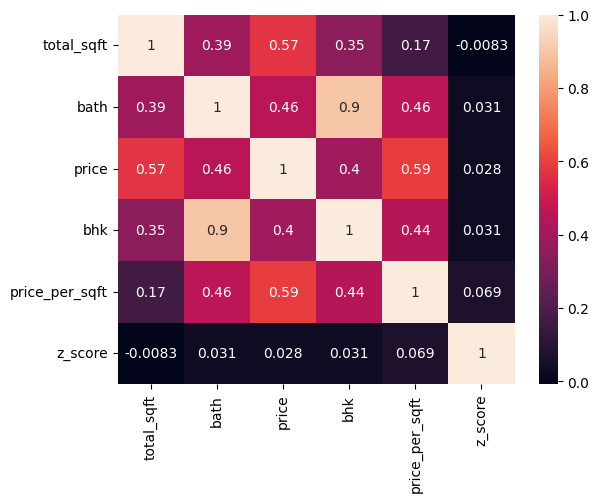

In [58]:
sns.heatmap(corr1,annot=True)

## scatter plot b/n variables

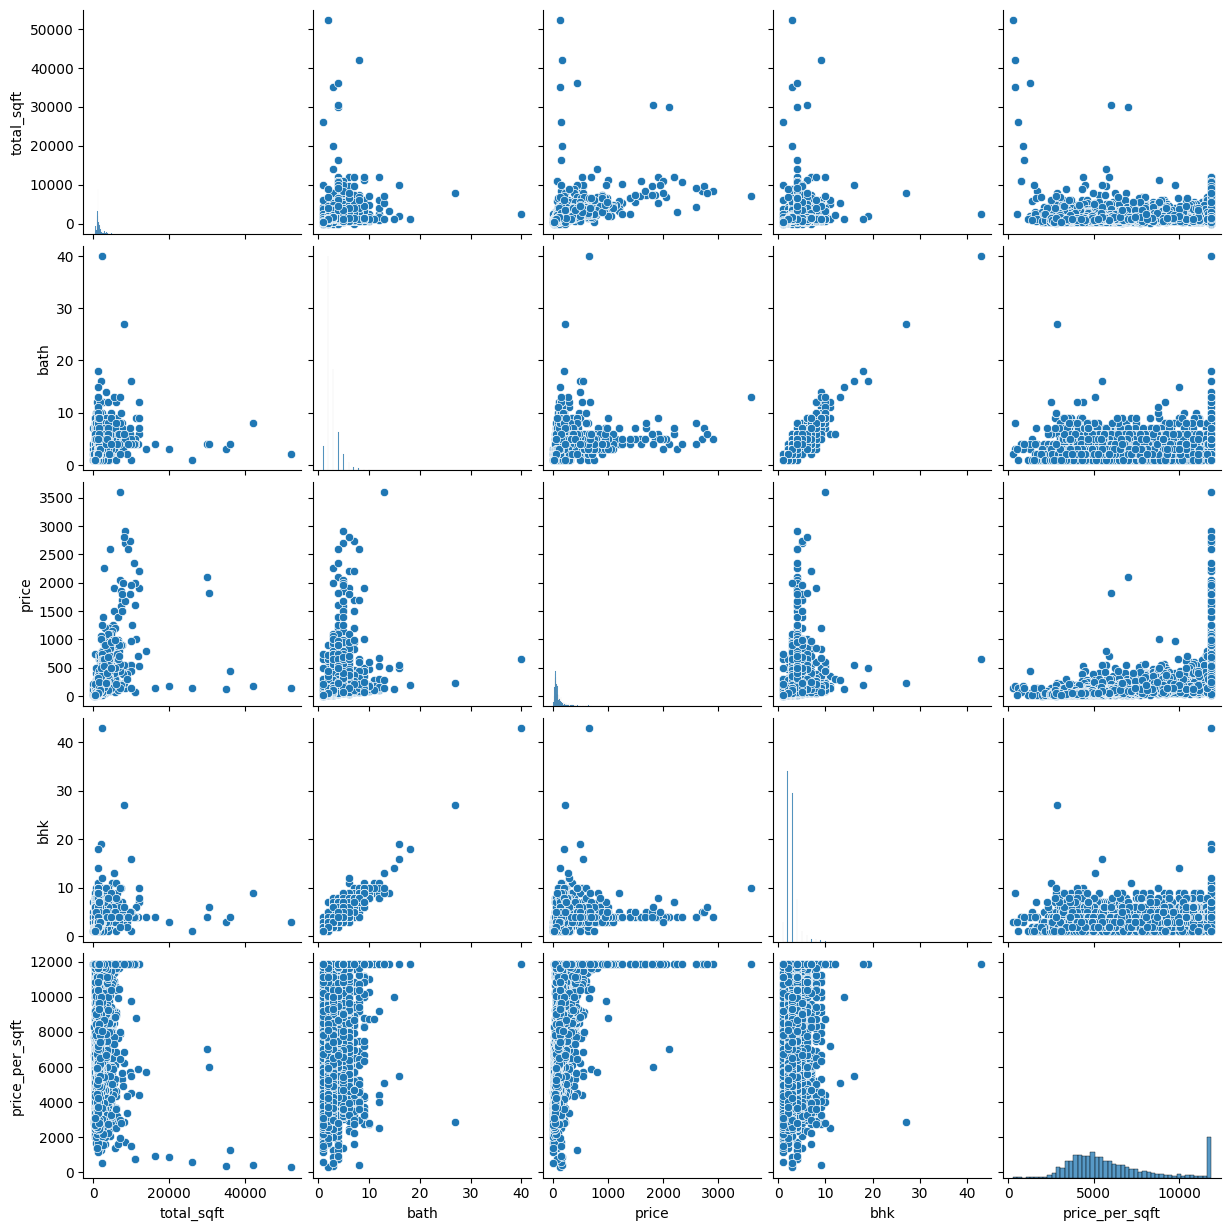

In [90]:
sns.pairplot(data1)